<a href="https://colab.research.google.com/github/harmonicfunc/LogicalRhythm2k23/blob/main/LR_ps2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'anyas-gojo-revival-bondman:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F63054%2F6872631%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240405%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240405T174316Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D0bd38467a110ffcdf55d347b5fad70ac34057fe4e93b9e1dd25e175332b0a886638abd46d6f4c13a40b2f544385f74aa7da0c8fddadbda1ce4246bb8ae145781430af7e4987f88aec441af2503f2e2b15f8025dd365ed298751c10be82e6fca45593af2e8293576f74a03283070052b83a2af98291b9a2928d9a9e141e6dd6fc53c534c28259c1159ddc840fdd38a3ab7b4041fcaba2b6e6fe42f1eb2a77aafcfb1d41346fb58c2f6adcad4285c786037ddfc52da501aa2bd08227a9d628c1ede6061f17c807b2dea7ee8bdaf301fdd7780e2b1f538cec5905d1e083e821e8f5c18397a537d611882d2736e2eb5c51dda4c59794b11aed45f1cc55596b359769'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 127492518 bytes downloaded
Downloaded and uncompressed: anyas-gojo-revival-bondman
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/anyas-gojo-revival-bondman/sample_submission.csv
/kaggle/input/anyas-gojo-revival-bondman/testData.csv
/kaggle/input/anyas-gojo-revival-bondman/trainData.csv


In [3]:
df = pd.read_csv('/kaggle/input/anyas-gojo-revival-bondman/trainData.csv')
df_test = pd.read_csv('/kaggle/input/anyas-gojo-revival-bondman/testData.csv')
df.shape

(523174, 23)

In [4]:
df.head()

,id,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,1,2019-12-15 10:35:10,3597926034019603,fraud_Ruecker Group,misc_net,7.19,Derrick,Flores,M,83690 Nicholas Ports Apt. 846,...,35.2229,-89.5518,9496,Furniture conservator/restorer,1993-03-23,2642fec2e19c9e18e61fe9a88f6bc79a,1355567710,35.189455,-90.121666,0
1,2,2019-04-10 21:49:53,4873783502705038,fraud_Lynch Ltd,shopping_pos,6.32,Elizabeth,Maxwell,F,194 Goodman Fall Apt. 569,...,48.4786,-122.3345,14871,Public house manager,1974-03-10,61cec15bdbd3db31b12f886e8e181380,1334094593,49.004316,-122.745016,0
2,3,2020-02-16 10:56:18,213161869125933,fraud_Bauch-Raynor,grocery_pos,147.59,Monica,Lane,F,3270 Scott Islands,...,44.6084,-70.6993,190,Animal nutritionist,1970-04-17,c8fcf575540e37ce0822cd040148ff57,1361012178,44.455449,-70.809148,0
3,4,2020-04-30 16:14:16,374656033243756,"fraud_Effertz, Welch and Schowalter",entertainment,32.40,David,Lewis,M,1499 Michael Rue,...,38.8954,-77.1633,207410,Mudlogger,1984-07-03,9e9cde0e0963ac746a2cc9938e171c9a,1367338456,39.476941,-77.613438,0
4,5,2019-12-05 21:07:59,6011999606625827,fraud_Wilkinson LLC,personal_care,29.79,Ronald,Carson,M,870 Rocha Drive,...,40.9918,-73.9800,4664,"Radiographer, diagnostic",1965-06-30,0742473d7f6261ce366b43ece063faf3,1354741679,40.863808,-74.674018,0


## EDA

In [5]:
df['is_fraud'].value_counts()

is_fraud
0    515668
1      7506
Name: count, dtype: int64

In [6]:
df.isnull().sum()

id                       0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [7]:
df.nunique()

id                       523174
trans_date_trans_time    519631
cc_num                      983
merchant                    693
category                     14
amt                       39741
first                       352
last                        481
gender                        2
street                      983
city                        894
state                        51
zip                         970
lat                         968
long                        969
city_pop                    879
job                         494
dob                         968
trans_num                523174
unix_time                519636
merch_lat                515071
merch_long               519735
is_fraud                      2
dtype: int64

In [8]:
df.dtypes

id                         int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [9]:
import matplotlib
params = {'axes.titlesize':'32',
          'xtick.labelsize':'24',
          'ytick.labelsize':'24'}
matplotlib.rcParams.update(params)

In [10]:
df.hist(bins=15, figsize=(100, 100));

<Axes: >

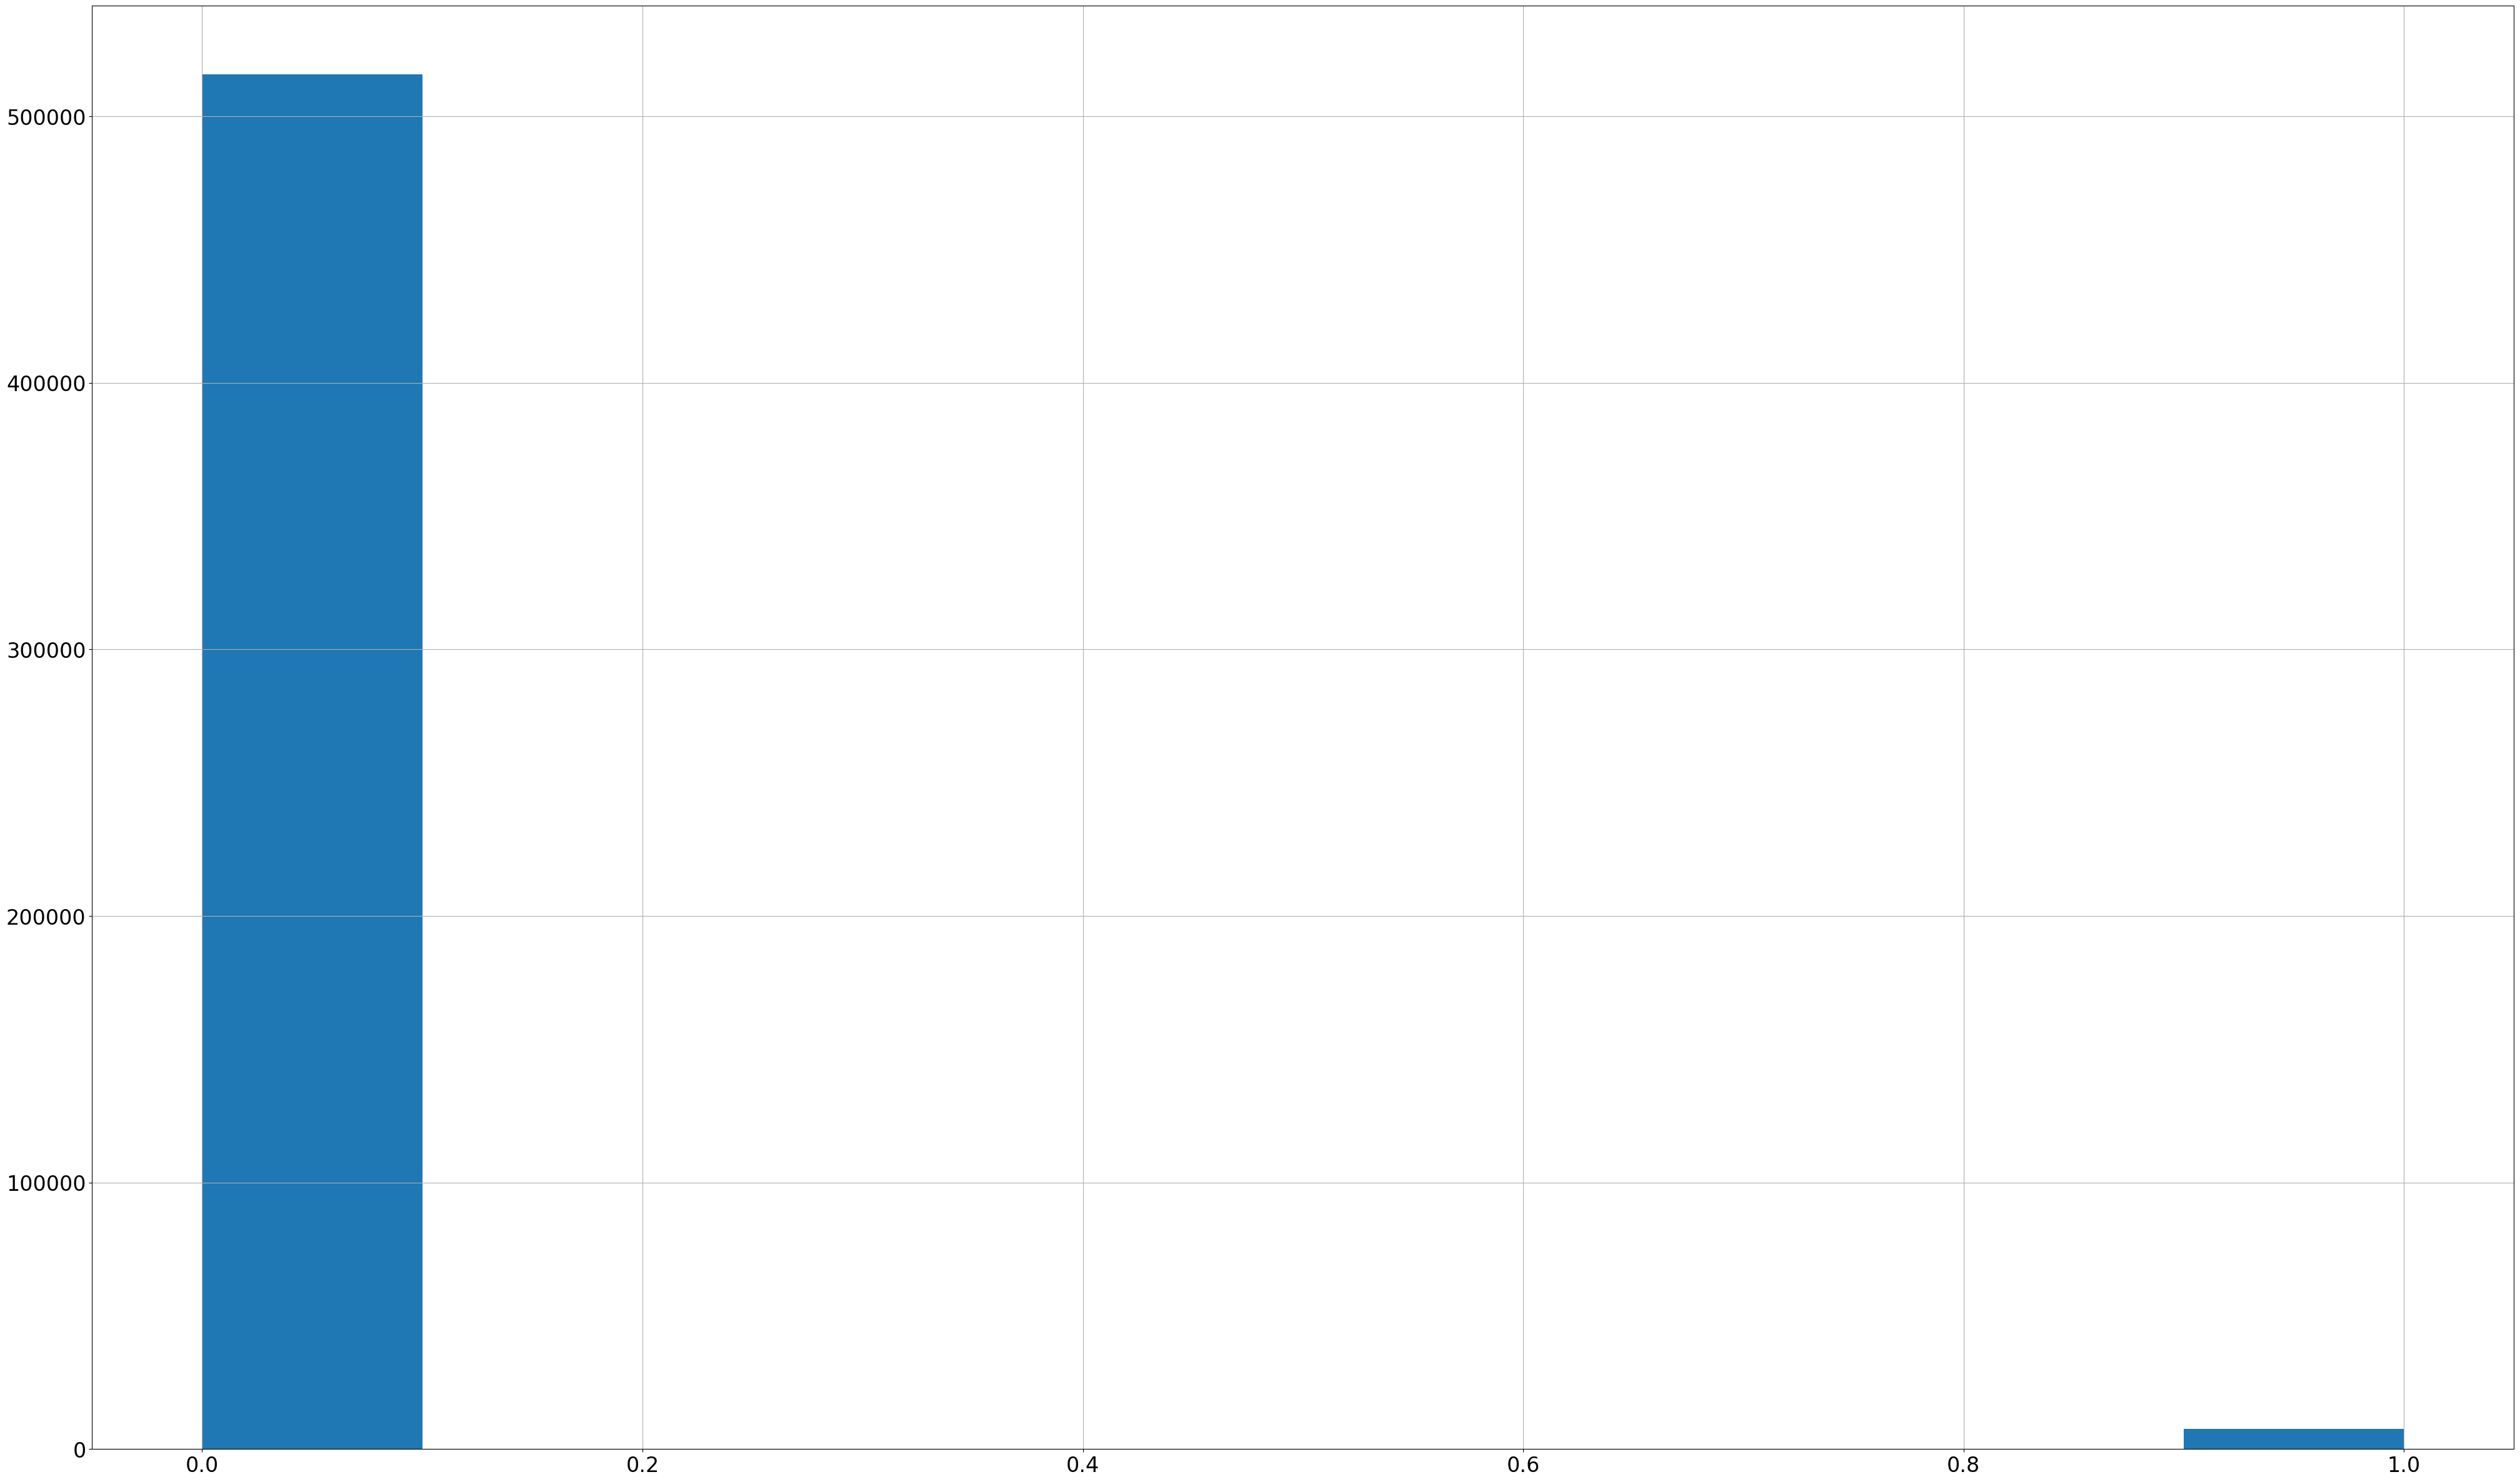

In [11]:
df['is_fraud'].hist(figsize = (50,30))

# Preprocessing

In [12]:
# Selecting numerical features
numerical_data = df.select_dtypes(include='number')

# Append the features of numerical_data to list
numerical_features=numerical_data.columns.tolist()

print(f'There are {len(numerical_features)} numerical features:', '\n')
numerical_features

There are 11 numerical features: 



['id',
 'cc_num',
 'amt',
 'zip',
 'lat',
 'long',
 'city_pop',
 'unix_time',
 'merch_lat',
 'merch_long',
 'is_fraud']

In [13]:
# Finding correlation data
correlation=numerical_data.corr()
correlation

,id,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
id,1.000000,-0.001012,0.000010,-0.001529,0.000691,0.001745,-0.000583,-0.000098,0.000747,0.001712,0.001967
cc_num,-0.001012,1.000000,0.002479,0.042381,-0.059231,-0.048314,-0.008786,0.002484,-0.059230,-0.048259,-0.001624
amt,0.000010,0.002479,1.000000,0.001545,-0.002790,0.000910,0.006112,-0.002081,-0.002769,0.000927,0.335056
zip,-0.001529,0.042381,0.001545,1.000000,-0.113806,-0.909929,0.078282,-0.000321,-0.113058,-0.909110,-0.003314
lat,0.000691,-0.059231,-0.002790,-0.113806,1.000000,-0.016235,-0.155657,-0.000030,0.993595,-0.016207,0.002797
long,0.001745,-0.048314,0.000910,-0.909929,-0.016235,1.000000,-0.053222,0.000222,-0.016171,0.999122,0.002683
city_pop,-0.000583,-0.008786,0.006112,0.078282,-0.155657,-0.053222,1.000000,-0.002234,-0.154811,-0.053262,0.003514
unix_time,-0.000098,0.002484,-0.002081,-0.000321,-0.000030,0.000222,-0.002234,1.000000,-0.000115,0.000201,-0.007968
merch_lat,0.000747,-0.059230,-0.002769,-0.113058,0.993595,-0.016171,-0.154811,-0.000115,1.000000,-0.016142,0.002529
merch_long,0.001712,-0.048259,0.000927,-0.909110,-0.016207,0.999122,-0.053262,0.000201,-0.016142,1.000000,0.002686


<Axes: >

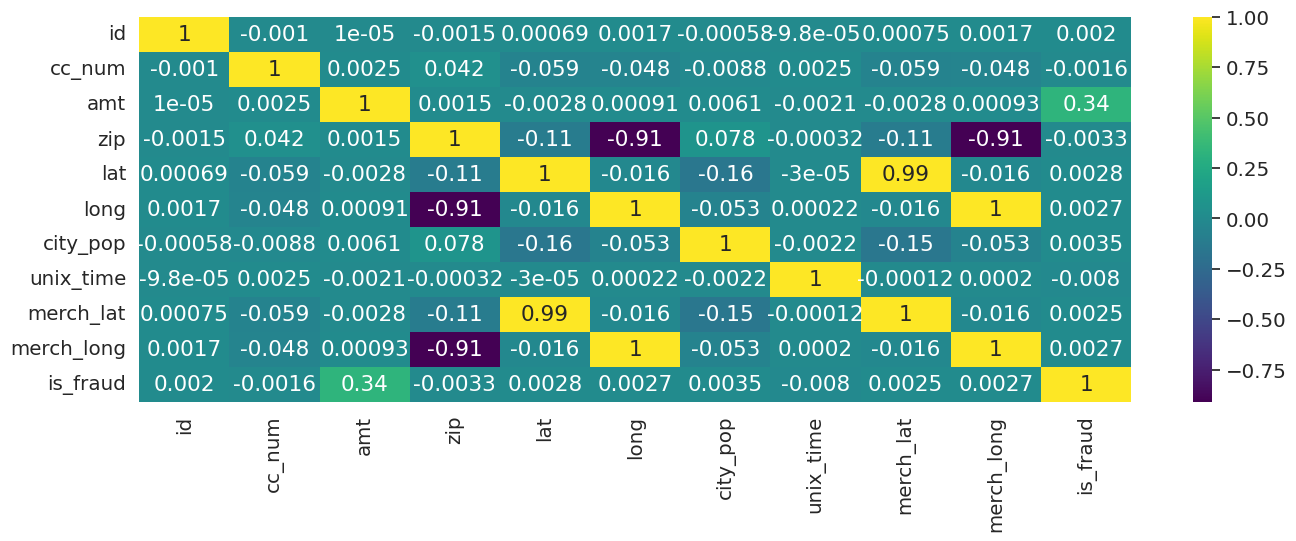

In [14]:
# Visualising the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.3)
plt.figure(figsize = (16,5))
sns.heatmap(correlation,cmap="viridis",annot=True)

In [15]:
df.drop(['first', 'last', 'trans_num', 'unix_time','cc_num','merch_lat','merch_long'], axis=1, inplace=True)
df.shape

(523174, 16)

In [16]:
def create_trans_time(df_train):
    df_train['trans_date_trans_time'] = pd.to_datetime(df_train['trans_date_trans_time'])

    # take only usefull time
    def take_hour(x):
         return x.hour

    df_train['trans_time'] = df_train['trans_date_trans_time'].apply(take_hour)

    df_train = df_train.drop(['trans_date_trans_time'], axis=1)
    return df_train

In [17]:
def preprocess_dob(df_train):
    df_train['dob'] = pd.to_datetime(df_train['dob'])

    def take_period(x):
        year = x.year
        age = 2023 - year

        return age

    df_train['dob'] = df_train['dob'].apply(take_period)
    return df_train

In [18]:
def preprocess_gender (df_train): # gender
    df_train['gender'] = df_train['gender'].apply(lambda x: 1 if x == 'F' else 0)
    return df_train


In [19]:
from sklearn.feature_extraction.text import CountVectorizer

def vectorize_and_drop(df_train, column_name, max_features=50):
    global vectorizers
    print(f'vectorizing {column_name} column')
    # Initialize the CountVectorizer
    vectorizer = CountVectorizer(max_features=max_features)

#     fit vectorizer on test dataframe
    vectorizer.fit(df_test[column_name])

    # Fit and transform the column
    vectors_train = vectorizer.fit_transform(df_train[column_name])
#     vectors_test = vectorizer.transform(df_test[column_name])

    # Convert the vectors to a DataFrame
    vectors_df_train = pd.DataFrame(vectors_train.toarray(), columns=vectorizer.get_feature_names_out())
#     vectors_df_test = pd.DataFrame(vectors_test.toarray(), columns=vectorizer.get_feature_names_out())

    df_train = pd.concat([df_train, vectors_df_train], axis=1)
#     df_test = pd.concat([df_test, vectors_df_test], axis=1)

    # Drop the original column
    df_train = df_train.drop(column_name, axis=1)
#     df_test = df_test.drop(column_name, axis=1)

    return df_train

In [20]:
def train_test_to_numeric(df_train):
    df_train = vectorize_and_drop(df_train, 'category')
    df_train = vectorize_and_drop(df_train, 'job')
    df_train = vectorize_and_drop(df_train, 'city')
    df_train = vectorize_and_drop(df_train, 'state')
    df_train = vectorize_and_drop(df_train, 'street')
    df_train = vectorize_and_drop(df_train, 'merchant')

    return df_train

In [21]:
df = create_trans_time(df)
df = preprocess_dob(df)
df = preprocess_gender(df)
df = train_test_to_numeric(df)

vectorizing category column
vectorizing job column
vectorizing city column
vectorizing state column
vectorizing street column
vectorizing merchant column


In [22]:
# def encode(df):
#     categorical_columns = df.select_dtypes(include=['object']).columns
#     for col in categorical_columns:
#         count_map = df[col].value_counts().to_dict()

#         # Map the column with dictionary
#         df[col] = df[col].map(count_map)

# encode(df)

In [23]:
df.shape

(523174, 273)

In [24]:
# Separate target from predictors
y = df.is_fraud
X = df.drop(['is_fraud'], axis=1)

In [25]:
#standard scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)

In [26]:
# Divide data into training and validation subsets
from sklearn.model_selection import train_test_split
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X_train_scaled, y, train_size=0.8, test_size=0.2,
                                                                random_state=0, stratify=y)


# Model Preparation and Training

In [27]:
from xgboost import XGBClassifier

# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# Define the parameter grid
# param_grid = {
#     'n_estimators': [100, 200],
#     'max_depth': [3, 4]
# }

# Create the XGBoost model
xgb = XGBClassifier()

# Use GridSearchCV or RandomizedSearchCV
# grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train_full, y_train)


In [28]:
# Get the best parameters
# best_params = grid_search.best_params_

In [29]:
from sklearn.metrics import accuracy_score

# Use the best parameters to create the final model
# my_model = XGBClassifier(**best_params)
my_model = XGBClassifier(n_estimators=100, random_state=42)
my_model.fit(X_train_full, y_train)

# # Make predictions on the test set
# y_pred = my_model.predict(X_test_scaled)

# # Evaluate the accuracy
# accuracy = accuracy_score(y_test, y_pred)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [30]:
prediction = my_model.predict(X_valid_full)
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [31]:
from sklearn.metrics import roc_auc_score
roc_score = roc_auc_score(prediction, y_valid)
print(roc_score)

0.9749394713897505


# Test Prediction

In [32]:
# Model prediction on the testData
test_df = pd.read_csv('/kaggle/input/anyas-gojo-revival-bondman/testData.csv')
test_df.shape

(555719, 22)

In [33]:
# preparing the test data
test_df.drop(['first', 'last', 'trans_num', 'unix_time','cc_num','merch_lat','merch_long'], axis=1, inplace=True)


In [34]:
test_df = create_trans_time(test_df)
test_df = preprocess_dob(test_df)
test_df = preprocess_gender(test_df)
test_df = train_test_to_numeric(test_df)

vectorizing category column
vectorizing job column
vectorizing city column
vectorizing state column
vectorizing street column
vectorizing merchant column


In [35]:
test_predict = my_model.predict(test_df)
# df_pred = pd.DataFrame(test_predict)
df_pred = list(test_predict)
# result_df = pd.concat([pd.DataFrame(test_df['id']), df_pred])
# result_df.columns = ['id', 'is_fraud']
# result_df
id_col = list(range(1,555720))
type(id_col)

list

In [36]:
test_df['id']

,id,id
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
555714,555715,0
555715,555716,0
555716,555717,0
555717,555718,1


In [37]:
len(test_predict)

555719

In [38]:
len(id_col)

555719

In [39]:
data = {'id': id_col, 'is_fraud': test_predict}
sub_df = pd.DataFrame(data)
sub_df.set_index('id', inplace=True)
sub_df

,is_fraud
id,
1,1
2,1
3,1
4,1
5,1
...,...
555715,1
555716,1
555717,1


# Submission File

In [40]:
sub_df.to_csv('submission.csv')